In [482]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

### Lectura de Datos

In [483]:
# Carga de datos
DATA_PATH = '/data/sespinoza/objetivo2/'
data = pd.read_csv(DATA_PATH + 'normalized_expression_mapped_peru.csv', header=0, index_col=0, sep=',', encoding='utf-8')

### Manejo de Nulos y Duplicados

In [484]:
print(data.isnull().sum().sum())

0


In [485]:
#borra los nulos
data = data.dropna()

In [486]:
data.head()

,GSM4043276_HCC004_HTA_2_0.CEL,GSM4043277_HCC011_HTA_2_0.CEL,GSM4043278_HCC013_HTA_2_0.CEL,GSM4043279_HCC015_HTA_2_0.CEL,GSM4043280_HCC016_HTA_2_0.CEL,GSM4043281_HCC025_HTA_2_0.CEL,GSM4043282_HCC026_HTA_2_0.CEL,GSM4043283_HCC034_HTA_2_0.CEL,GSM4043284_HCC047_HTA_2_0.CEL,GSM4043285_HCC054_HTA_2_0.CEL,...,GSM4043336_NTL121_HTA_2_0.CEL,GSM4043337_NTL173_HTA_2_0.CEL,GSM4043338_NTL188_HTA_2_0.CEL,GSM4043339_NTL190_HTA_2_0.CEL,GSM4043340_NTL191_HTA_2_0.CEL,GSM4043341_NTL192_HTA_2_0.CEL,GSM4043342_NTL193_HTA_2_0.CEL,GSM4043343_NTL200_HTA_2_0.CEL,GSM4043344_NTL201_HTA_2_0.CEL,GeneSymbol
TC01000001.hg.1,5.556382,5.385476,5.582431,5.321239,5.580150,5.090377,5.543542,5.815775,5.781128,5.462648,...,5.747558,5.685633,5.678107,5.479305,5.159973,5.572072,5.586533,5.509569,5.263971,DDX11L1
TC01000003.hg.1,3.522511,3.011026,3.754522,3.216142,3.343459,3.151042,3.232807,3.496659,3.271508,3.475425,...,3.641678,3.554388,3.807339,3.292701,3.069621,3.794532,3.673249,3.423120,3.463470,OR4F5
TC01000005.hg.1,8.388213,8.461633,8.107028,8.165957,8.615982,8.331395,8.491633,8.543905,8.646759,8.200830,...,8.313295,8.007746,8.127470,8.079236,8.439039,8.140706,8.413719,8.269379,8.615382,LINC01001
TC01000007.hg.1,11.313075,11.423049,11.083901,11.134547,11.388560,11.209667,11.249790,11.319392,11.483748,11.555652,...,11.500850,10.496035,11.170733,10.906176,11.196305,11.003916,11.591072,11.292875,11.805233,LINC01061
TC01000009.hg.1,3.510059,3.054648,3.632833,3.064161,3.315992,2.796682,3.583861,2.924338,3.181977,2.668511,...,3.061490,3.128445,3.478542,3.024672,2.822522,3.299731,2.986613,3.001979,3.001183,OR4F29


In [487]:
data = data.drop_duplicates(subset='GeneSymbol', keep='first')

### Generar etiqueta a predecir

In [488]:
data.set_index('GeneSymbol', inplace=True)

In [489]:
labels_ma = ['cancer' if 'HCC' in col else 'healthy' if 'NTL' in col else 'unknown' for col in data.columns]
print(labels_ma)

['cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy']


In [490]:
data = data.T
# Añadir las etiquetas al DataFrame
data['labels'] = labels_ma
# Mostrar las etiquetas asignadas
print(data['labels'])

GSM4043276_HCC004_HTA_2_0.CEL     cancer
GSM4043277_HCC011_HTA_2_0.CEL     cancer
GSM4043278_HCC013_HTA_2_0.CEL     cancer
GSM4043279_HCC015_HTA_2_0.CEL     cancer
GSM4043280_HCC016_HTA_2_0.CEL     cancer
                                  ...   
GSM4043340_NTL191_HTA_2_0.CEL    healthy
GSM4043341_NTL192_HTA_2_0.CEL    healthy
GSM4043342_NTL193_HTA_2_0.CEL    healthy
GSM4043343_NTL200_HTA_2_0.CEL    healthy
GSM4043344_NTL201_HTA_2_0.CEL    healthy
Name: labels, Length: 69, dtype: object


In [491]:
#borra todas las filas donde labels es unknown y cuenta cuantos hay
print(data.labels.value_counts())
data = data[data.labels != 'unknown']

cancer     39
healthy    30
Name: labels, dtype: int64


In [492]:
data['labels'].head()

GSM4043276_HCC004_HTA_2_0.CEL    cancer
GSM4043277_HCC011_HTA_2_0.CEL    cancer
GSM4043278_HCC013_HTA_2_0.CEL    cancer
GSM4043279_HCC015_HTA_2_0.CEL    cancer
GSM4043280_HCC016_HTA_2_0.CEL    cancer
Name: labels, dtype: object

In [493]:
#guarda data en un archivo csv
data.to_csv(DATA_PATH + 'data_peru_prep.csv')

In [494]:
#data_p1 = data.loc[:, ['AFP', 'F2', 'CEACAM5', 'TP53', 'CD8A', 'labels']]
data_p1 = data.loc[:, ['AFP', 'F2', 'CEACAM5', 'TP53', 'CD8A']]

In [495]:
#ASPM, CCNB1, CDK1, DLGAP5, KIF20 A, MT1X, and TOP2A
data_p2 = data.loc[:, ['ASPM', 'CCNB1', 'CDK1', 'DLGAP5', 'KIF20A', 'MT1X', 'TOP2A']]

In [496]:
#SOCS2 AKR1C3 CCNB1 PTEN FAM83D CDC20 CYP2E1
data_p3 = data.loc[:, ['SOCS2', 'AKR1C3', 'CCNB1', 'PTEN', 'FAM83D', 'CDC20','AOX1', 'CYP2E1','AFP',]]

In [497]:
#LAMC1, UBE4B, HSPH1, HNF1A, SF3B1, APC2, CHST4, HGF, MTHFD2, and AGO3,
data_p4 = data.loc[:, ['LAMC1', 'UBE4B', 'HSPH1', 'HNF1A', 'SF3B1', 'APC2', 'CHST4', 'HGF', 'MTHFD2', 'AGO3']]

In [498]:
#TOP2A, CDC20, ASPM, PRC1, UBE2C, and NUSAP1
data_p5 = data.loc[:, ['TOP2A', 'CDC20', 'ASPM', 'PRC1', 'UBE2C', 'NUSAP1']]

In [499]:
#IRF9, PFKFB3, DTX3L, AOX1, UTP15, ALG5
data_p6 = data.loc[:, ['IRF9', 'PFKFB3', 'DTX3L', 'AOX1', 'UTP15', 'ALG5']]

In [500]:
data_labels= data.loc[:,['labels']]

In [501]:
print(data_p1.shape)
print(data_p2.shape)
print(data_p3.shape)
print(data_p4.shape)
print(data_p5.shape)
print(data_p6.shape)
print(data_labels.shape)

(69, 5)
(69, 7)
(69, 9)
(69, 10)
(69, 6)
(69, 6)
(69, 1)


In [502]:
#junta data_p1 , data_p2 , data_p3, data_p4, data_p5, data_p6, data_labels
data_junta = pd.concat([data_p1, data_p2, data_p3, data_p4, data_p5, data_p6, data_labels ], axis=1)
#elimana las columnas duplicadas deja una 
data_junta = data_junta.loc[:,~data_junta.columns.duplicated()]

In [503]:
data_junta.head()

GeneSymbol,AFP,F2,CEACAM5,TP53,CD8A,ASPM,CCNB1,CDK1,DLGAP5,KIF20A,...,AGO3,PRC1,UBE2C,NUSAP1,IRF9,PFKFB3,DTX3L,UTP15,ALG5,labels
GSM4043276_HCC004_HTA_2_0.CEL,3.351665,10.141542,4.696799,6.999697,6.136806,4.110110,4.778999,3.260736,3.781032,4.486760,...,6.419852,5.038514,5.754679,4.858761,6.763665,6.652837,7.376123,5.421491,5.796355,cancer
GSM4043277_HCC011_HTA_2_0.CEL,10.145141,9.423482,4.213270,6.650938,6.495708,7.796331,6.659267,5.258147,6.176334,6.407129,...,6.347176,7.153082,6.465161,7.587892,7.138174,7.098197,8.482162,5.545144,5.747301,cancer
GSM4043278_HCC013_HTA_2_0.CEL,8.572565,9.752121,4.373660,7.206835,6.021928,7.117443,6.207112,4.657269,5.343127,5.979888,...,6.280249,6.807733,6.371543,6.747564,7.103420,6.569892,7.320375,5.536532,5.560623,cancer
GSM4043279_HCC015_HTA_2_0.CEL,6.198832,9.950746,4.335583,7.578714,6.027868,5.905121,5.052133,3.854742,4.283997,4.942791,...,6.578473,5.933380,5.967534,6.281429,6.762753,7.911587,8.184095,5.924163,6.179776,cancer
GSM4043280_HCC016_HTA_2_0.CEL,3.366131,9.838946,4.561381,7.250749,6.433509,4.901645,5.070973,3.631008,4.396417,4.917592,...,6.608133,5.564391,5.942627,5.761778,6.797950,7.516215,7.659811,5.286995,5.727880,cancer


In [504]:
print(data_junta.shape)

(69, 38)


In [505]:
print(data_junta['labels'].head())
print(data_junta['labels'].shape)

GSM4043276_HCC004_HTA_2_0.CEL    cancer
GSM4043277_HCC011_HTA_2_0.CEL    cancer
GSM4043278_HCC013_HTA_2_0.CEL    cancer
GSM4043279_HCC015_HTA_2_0.CEL    cancer
GSM4043280_HCC016_HTA_2_0.CEL    cancer
Name: labels, dtype: object
(69,)


In [506]:
#GUARDA data_junta en un archivo csv
data_junta.to_csv(DATA_PATH + 'data_peru_prep_biomarkers.csv')

In [507]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_junta['labels'] = label_encoder.fit_transform(data_junta['labels'])

In [508]:
#matriz de correlacion de pearson
correlation_matrix = data_junta.corr(method='pearson')

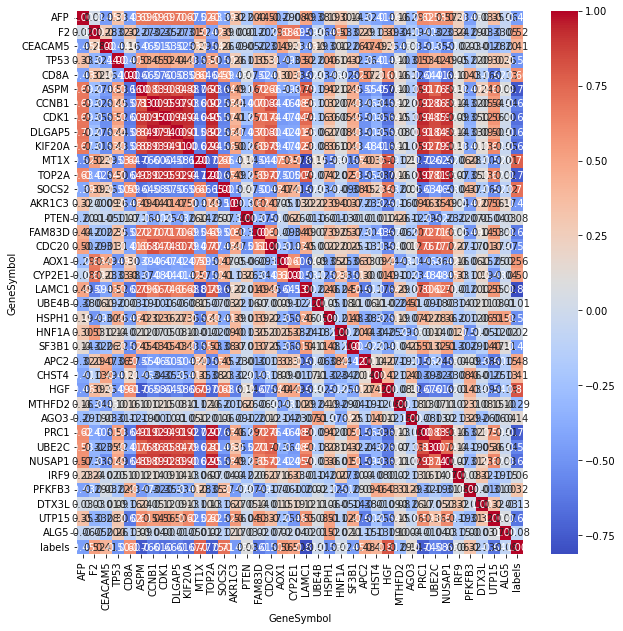

In [509]:
#grafica de matriz de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [510]:
print("Clases y sus correspondientes etiquetas numéricas:")
for class_label, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {class_label}")

Clases y sus correspondientes etiquetas numéricas:
cancer: 0
healthy: 1


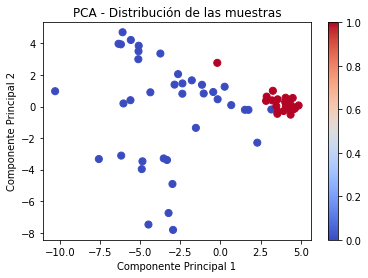

In [511]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data_junta.drop('labels', axis=1)
labels = data_junta['labels']
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)  # X son tus datos de expresión génica

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='coolwarm', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.title('PCA - Distribución de las muestras')
plt.show()


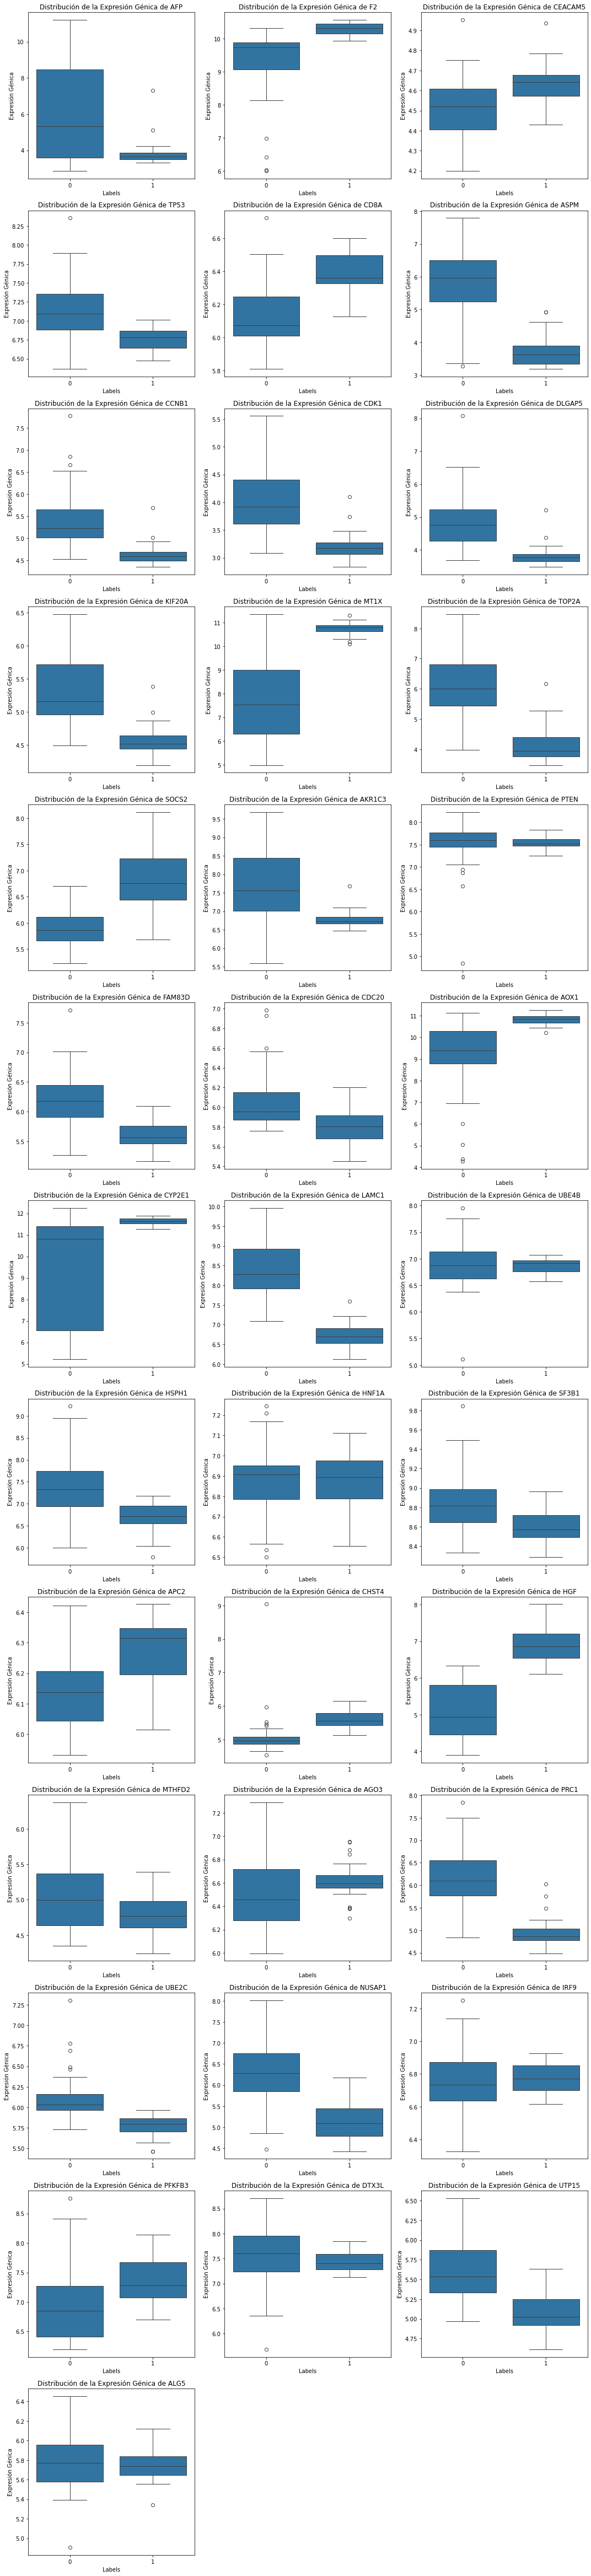

In [512]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

genes = X.columns
# Crea un DataFrame donde X son los niveles de expresión y labels son las etiquetas de clase
df = pd.DataFrame(X, columns=genes)  # genes son los nombres de los genes
df['labels'] = labels

# Determinar el número de filas y columnas para los subplots
num_genes = len(genes)
cols = 3  # Número de columnas en la figura
rows = math.ceil(num_genes / cols)  # Número de filas en la figura

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for idx, gene in enumerate(genes):
    sns.boxplot(x='labels', y=gene, data=df, ax=axes[idx])
    axes[idx].set_title(f'Distribución de la Expresión Génica de {gene}')
    axes[idx].set_xlabel('Labels')
    axes[idx].set_ylabel('Expresión Génica')

# Eliminar subplots vacíos si el número de genes no es múltiplo de cols
for i in range(num_genes, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('distribucion_expresion_genica.jpg')
plt.show()

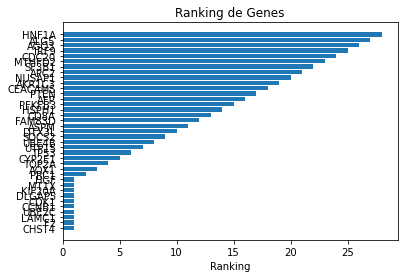

In [513]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_train = data_junta.drop('labels', axis=1)
y_train = data_junta['labels']
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)
ranking = rfe.ranking_
indices = np.argsort(ranking)
plt.barh(range(len(indices)), ranking[indices], align='center')
plt.yticks(range(len(indices)), [genes[i] for i in indices])
plt.xlabel('Ranking')
plt.title('Ranking de Genes')
plt.show()

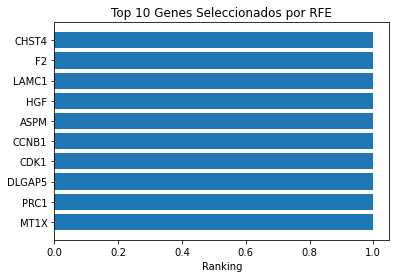

In [514]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rank = 10
# Supongo que ya tienes X_train y y_train definidos
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=rank)  # Selecciona los 10 mejores genes
rfe.fit(X_train, y_train)

# Obtén el ranking de los genes
ranking = rfe.ranking_

# Ordena los índices según el ranking
indices = np.argsort(ranking)

# Toma solo los 10 mejores genes (ranking = 1)
top_10_genes = [genes[i] for i in indices[:rank]]  # genes es la lista de nombres de los genes
top_10_ranking = ranking[indices[:rank]]

# Visualización de los 10 mejores genes
plt.barh(range(rank), top_10_ranking, align='center')
plt.yticks(range(rank), top_10_genes)  # Coloca los nombres de los genes en el eje Y
plt.xlabel('Ranking')
plt.title('Top 10 Genes Seleccionados por RFE')
plt.gca().invert_yaxis()  # Invierte el eje Y para que el mejor rankeado esté arriba
plt.show()
